In [1]:
#text clustering
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
df = pd.read_csv('/content/drive/My Drive/result1.csv')
df.head()

,_id,topic,heading,summary,date_published,author,content,tags
0,5ef0d2b4d83b3587cb500ec9,"[""analysis""]","[""Don’t discriminate against non-resident migr...","[""Create a legal regime that allows them to ac...","[""Updated: Jun 22, 2020 19:30 IST""]","[""KP Krishnan and Anirudh Burman""]","[""Prime Minister (PM) Narendra Modi recently a...","[""India"",""Narendra Modi"",""BIHAR"",""Haryana"",""Mi..."
1,5ef0d2b8d83b3587cb500ecb,"[""opinion""]","[""India has closed military gap with China alo...","[""Over the past dozen years India has not only...","[""Updated: Jun 22, 2020 16:01 IST""]","[""Pramit Pal Chaudhuri""]","[""India has the "","", says a recent Harvard Uni...","[""Indian Army"",""Galwan Valley"",""India China bo..."
2,5ef0d2bad83b3587cb500ecc,"[""opinion""]","[""Ladakh faceoff: Looking back for a way forwa...","[""DRAW THE LINE Policing the borders and preve...","[""Updated: Jun 22, 2020 18:06 IST""]","[""Lt Gen GS Sihota (retd)""]","[""On December 11, 1917, General Edmund Allenby...",NaN
3,5ef0d2bdd83b3587cb500ecd,"[""editorials""]","[""Redesign the model village scheme | HT Edito...","[""For MPs to take it up, expand its ambit to a...","[""Updated: Jun 22, 2020 18:56 IST""]",NaN,"[""A study commissioned by the Union ministry o...",NaN
4,5ef0d2bed83b3587cb500ece,"[""columns""]","[""How China has overplayed its hand, writes Ba...","[""Beijing’s belligerence reflects a familiar h...","[""Updated: Jun 22, 2020 19:31 IST""]","[""Baijayant “Jay” Panda""]","[""Almost 2,500 years ago, Greek historian, Thu...","[""CHINA"",""India""]"


In [8]:
df.shape

(148, 8)

In [6]:
df.dropna(subset = ['content'], inplace= True)
df.dropna(subset = ['topic'], inplace = True)

In [7]:
df.topic.nunique()

27

In [9]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
import gensim
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import re

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
# data preprocessing
stemmer = SnowballStemmer(language='english',ignore_stopwords=True)
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [11]:
# preview after preprocessing
doc_sample = df.content[0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['["Prime', 'Minister', '(PM)', 'Narendra', 'Modi', 'recently', 'announced', 'that', 'India', 'must', 'become', '","(self-reliant).', 'One', 'aspect', 'of', 'this', 'could', 'be', 'that', 'India', 'will', 'remove', 'barriers', 'within', 'its', 'internal', 'markets', 'to', 'truly', 'become', 'a', 'single', 'market.', 'It', 'will', 'remove', 'the', 'hurdles', 'to', 'efficiency', 'improvements', 'and', 'become', 'more', 'competitive.', 'The', 'Goods', 'and', 'Services', 'Tax', '(GST)', 'was', 'a', 'step', 'in', 'this', 'direction.', 'Recent', 'decisions', 'to', 'remove', 'hurdles', 'in', 'inter-state', 'agricultural', 'trade', 'are', 'also', 'similar.', 'For', 'agricultural', 'and', 'industrial', 'products,', 'as', 'well', 'as', 'capital,', 'India', 'is', 'increasingly', 'becoming', 'a', 'single', 'market.', 'The', 'creation', 'of', 'a', 'barrier-free', 'domestic', 'market', 'is', 'also', 'an', 'intent', 'reflected', 'in', 'Article', '301', 'of', 'the', 'Constitution."

In [12]:
# Preprocess the headline text, saving the results as ‘processed_docs’
processed_docs = df['content'].map(preprocess)
df['processed_topic'] = df['topic'].map(preprocess)
#processed_docs.head(5)
df['processed_content'] = processed_docs
#df.head()
df['processed_content'] = df['processed_content'].apply(lambda x: ' '.join(x))

df['processed_topic'] = df['processed_topic'].apply(lambda x: ' '.join(x))
df.head()

,_id,topic,heading,summary,date_published,author,content,tags,processed_topic,processed_content
0,5ef0d2b4d83b3587cb500ec9,"[""analysis""]","[""Don’t discriminate against non-resident migr...","[""Create a legal regime that allows them to ac...","[""Updated: Jun 22, 2020 19:30 IST""]","[""KP Krishnan and Anirudh Burman""]","[""Prime Minister (PM) Narendra Modi recently a...","[""India"",""Narendra Modi"",""BIHAR"",""Haryana"",""Mi...",analysi,prime minist narendra modi recent announc indi...
1,5ef0d2b8d83b3587cb500ecb,"[""opinion""]","[""India has closed military gap with China alo...","[""Over the past dozen years India has not only...","[""Updated: Jun 22, 2020 16:01 IST""]","[""Pramit Pal Chaudhuri""]","[""India has the "","", says a recent Harvard Uni...","[""Indian Army"",""Galwan Valley"",""India China bo...",opinion,india say recent harvard univers assess chines...
2,5ef0d2bad83b3587cb500ecc,"[""opinion""]","[""Ladakh faceoff: Looking back for a way forwa...","[""DRAW THE LINE Policing the borders and preve...","[""Updated: Jun 22, 2020 18:06 IST""]","[""Lt Gen GS Sihota (retd)""]","[""On December 11, 1917, General Edmund Allenby...",NaN,opinion,decemb general edmund allenbi enter holi citi ...
3,5ef0d2bdd83b3587cb500ecd,"[""editorials""]","[""Redesign the model village scheme | HT Edito...","[""For MPs to take it up, expand its ambit to a...","[""Updated: Jun 22, 2020 18:56 IST""]",NaN,"[""A study commissioned by the Union ministry o...",NaN,editori,studi commiss union ministri rural develop saa...
4,5ef0d2bed83b3587cb500ece,"[""columns""]","[""How China has overplayed its hand, writes Ba...","[""Beijing’s belligerence reflects a familiar h...","[""Updated: Jun 22, 2020 19:31 IST""]","[""Baijayant “Jay” Panda""]","[""Almost 2,500 years ago, Greek historian, Thu...","[""CHINA"",""India""]",column,year greek historian thucydid write devast pel...


In [13]:
df.to_csv('/content/drive/My Drive/edited_148_data.csv')

In [14]:
#feature extraction
vec = TfidfVectorizer(stop_words="english")
vec.fit(df.processed_content.values)
features = vec.transform(df.processed_content.values)

In [15]:
#model training
random_state = 0
cls = MiniBatchKMeans(n_clusters=17, random_state=random_state)
cls.fit(features)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=17, n_init=3, random_state=0,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [16]:
#predict on new data
cls.predict(features)

array([ 1, 16, 16,  1, 16, 16, 16, 16,  1,  0,  7, 14,  7,  2,  3, 11,  0,
        3,  7, 13,  7, 10,  1,  7,  7,  7,  7,  7,  7, 11, 11, 16, 14,  0,
        0,  4,  4,  4,  4,  8, 15,  7,  6, 14,  7,  7,  7,  7, 16,  1, 16,
       11, 16,  1,  1,  7, 11, 14, 11,  2,  7, 10, 15,  7, 16, 14,  3, 10,
       15,  7,  7,  1, 10,  7,  7, 14,  8,  7, 12, 11, 11, 16,  0,  3,  3,
        1,  7,  3,  8,  1,  1,  7,  7,  7, 12, 14, 10,  7,  9,  1,  5, 16,
        5,  1, 16,  3,  7,  8,  7,  0,  7,  7, 10, 12,  3,  1, 11,  8,  9,
       14,  2,  5,  7,  1,  7,  9,  7, 12,  7,  1, 11, 11, 14,  0, 11,  4,
        4,  7,  1,  8,  7,  7,  7, 13,  7,  7,  7,  2], dtype=int32)

In [29]:
actual_labels

array([ 1, 20, 20,  9,  5,  1,  9, 16, 16, 26, 26, 16, 25, 25, 17, 18,  8,
       10,  2,  6, 25, 26, 16,  0,  0,  0, 11, 12,  7, 18, 18, 18,  8, 16,
        8, 10, 10, 10,  3,  3,  2, 19,  0,  6, 13, 13, 25, 26,  9,  1,  1,
        1,  1,  5,  9, 26, 16, 16, 16, 25, 26, 26,  0, 11, 18, 16, 10,  3,
        2, 22, 25, 26, 16,  0,  0,  0, 24, 11, 11, 18, 18, 16,  8, 16, 10,
       10, 10, 10,  3,  3,  3,  2,  2, 21, 22,  6, 23, 25, 25,  1,  5,  9,
        1,  9,  9,  1, 16, 26, 16, 16, 25, 16, 26, 17, 10,  8, 10,  3,  2,
        6, 25, 26,  4,  0,  0,  0, 14, 17, 17, 18, 18, 18,  8,  8,  8, 10,
       10,  3, 16,  3, 15,  2,  0, 22, 22, 13, 25, 25])

In [30]:
df.processed_topic[:50]

0           analysi
1           opinion
2           opinion
3           editori
4            column
5           analysi
6           editori
7             india
8             india
9             world
10            world
11            india
12            viral
13            viral
14         lifestyl
15           mumbai
16            delhi
17             educ
18        bollywood
19          cricket
20            viral
21            world
22            india
23                 
24                 
25                 
26    fashion trend
27              fit
28           cultur
29           mumbai
30           mumbai
31           mumbai
32            delhi
33            india
34            delhi
35             educ
36             educ
37             educ
38             busi
39             busi
40        bollywood
41            music
42                 
43          cricket
44          footbal
45          footbal
46            viral
47            world
53          editori
54          analysi


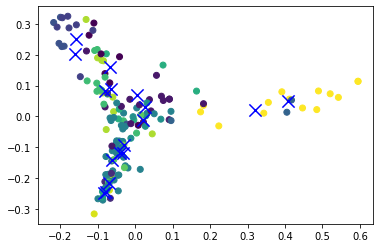

In [17]:
#visualization
# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

In [ ]:
#evaluation with labelled dataset
from sklearn.metrics import homogeneity_score
homogeneity_score(df.processed_content, cls.predict(features))

0.5103773893381282

In [ ]:

#evaluation with unlabelled dataset
from sklearn.metrics import silhouette_score
silhouette_score(features, labels=cls.predict(features))

0.033542765900674856

In [18]:
#more on accuracy scores

#actual labels
actual_labels = np.unique(df.processed_topic, return_inverse=True)[1]
#pd.factorize(df.processed_topic)[0]

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(cls.labels_, actual_labels)

0.0472972972972973

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(30.5, 0.5, 'predicted label')

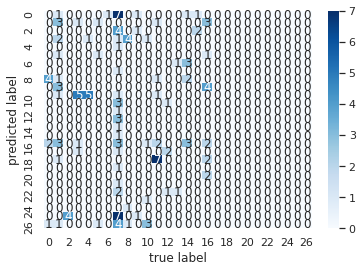

In [20]:
import seaborn as sns
sns.set()
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(cls.labels_, actual_labels)
sns.heatmap(mat.T, annot=True, fmt='d', cmap = 'Blues')
plt.xlabel('true label')
plt.ylabel('predicted label')

In [21]:
from sklearn.metrics import classification_report
classification_report(actual_labels, cls.labels_) 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00        12\n           1       0.18      0.33      0.23         9\n           2       0.00      0.00      0.00         7\n           3       0.00      0.00      0.00         9\n           4       0.00      0.00      0.00         1\n           5       0.33      0.33      0.33         3\n           6       0.00      0.00      0.00         4\n           7       0.02      1.00      0.05         1\n           8       0.00      0.00      0.00         8\n           9       0.00      0.00      0.00         7\n          10       0.00      0.00      0.00        13\n          11       0.00      0.00      0.00         4\n          12       0.00      0.00      0.00         1\n          13       0.00      0.00      0.00         3\n          14       0.00      0.00      0.00         1\n          15       0.00      0.00      0.00         1\n          16       0.14      0.12      0.13        17\n       

In [25]:
from sklearn.metrics import precision_score
precision_score(actual_labels, cls.labels_,  average='micro')

0.0472972972972973

In [27]:
from sklearn.metrics import recall_score
recall_score(actual_labels, cls.labels_, average='micro')

0.0472972972972973

In [ ]:
#topic modelling
import spacy
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

random_state = 0

def only_nouns(texts):
    output = []
    for doc in nlp.pipe(texts):
        noun_text = " ".join(token.lemma_ for token in doc if token.pos_ == 'NOUN')
        output.append(noun_text)
    return output


df['noun_content'] = only_nouns(df['content'])

df.head()

,_id,topic,heading,summary,date_published,author,content,tags,processed_content,noun_content
0,5ef0d2b4d83b3587cb500ec9,"[""analysis""]","[""Don’t discriminate against non-resident migr...","[""Create a legal regime that allows them to ac...","[""Updated: Jun 22, 2020 19:30 IST""]","[""KP Krishnan and Anirudh Burman""]","[""Prime Minister (PM) Narendra Modi recently a...","[""India"",""Narendra Modi"",""BIHAR"",""Haryana"",""Mi...",prime minist narendra modi recent announc indi...,self aspect barrier market market hurdle impro...
1,5ef0d2b8d83b3587cb500ecb,"[""opinion""]","[""India has closed military gap with China alo...","[""Over the past dozen years India has not only...","[""Updated: Jun 22, 2020 16:01 IST""]","[""Pramit Pal Chaudhuri""]","[""India has the "","", says a recent Harvard Uni...","[""Indian Army"",""Galwan Valley"",""India China bo...",india say recent harvard univers assess chines...,assessment co - author o’donnell presence forc...
2,5ef0d2bad83b3587cb500ecc,"[""opinion""]","[""Ladakh faceoff: Looking back for a way forwa...","[""DRAW THE LINE Policing the borders and preve...","[""Updated: Jun 22, 2020 18:06 IST""]","[""Lt Gen GS Sihota (retd)""]","[""On December 11, 1917, General Edmund Allenby...",NaN,decemb general edmund allenbi enter holi citi ...,city foot feat warrior street city centre sold...
3,5ef0d2bdd83b3587cb500ecd,"[""editorials""]","[""Redesign the model village scheme | HT Edito...","[""For MPs to take it up, expand its ambit to a...","[""Updated: Jun 22, 2020 18:56 IST""]",NaN,"[""A study commissioned by the Union ministry o...",NaN,studi commiss union ministri rural develop saa...,study ministry development scheme impact purpo...
4,5ef0d2bed83b3587cb500ece,"[""columns""]","[""How China has overplayed its hand, writes Ba...","[""Beijing’s belligerence reflects a familiar h...","[""Updated: Jun 22, 2020 19:31 IST""]","[""Baijayant “Jay” Panda""]","[""Almost 2,500 years ago, Greek historian, Thu...","[""CHINA"",""India""]",year greek historian thucydid write devast pel...,year historian war growth power fear conflict ...


In [ ]:
# change this to see different results using the components_ attribute
n_topics = 17

#for extracting features
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vec = TfidfVectorizer(max_features=5000, stop_words="english", max_df=0.95, min_df=2)
features = vec.fit_transform(df.noun_content)

#for topic modelling

from sklearn.decomposition import NMF
cls = NMF(n_components=n_topics, random_state=random_state)
cls.fit(features)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=17, random_state=0, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [ ]:
# list of unique words found by the vectorizer
feature_names = vec.get_feature_names()

# number of most influencing words to display per topic
n_top_words = 15

for i, topic_vec in enumerate(cls.components_):
    print(i, end=' ')
    # topic_vec.argsort() produces a new array
    # in which word_index with the least score is the
    # first array element and word_index with highest
    # score is the last array element. Then using a
    # fancy indexing [-1: -n_top_words-1:-1], we are
    # slicing the array from its end in such a way that
    # top `n_top_words` word_index with highest scores
    # are returned in desceding order
    for fid in topic_vec.argsort()[-1:-n_top_words-1:-1]:
        print(feature_names[fid], end=' ')
    print()

0 patient oxygen home plasma minister isolation oximeter hospital test government pulse day health level capital 
1 school teacher class learning student child education government parent fee feel teaching state minister college 
2 film actor love family life role father outsider book picture heart thing time people release 
3 border power line force war conflict economy option country leadership term infrastructure time cost engagement 
4 video post comment doggo user clip hooman thought person recording pooch picture account soul dog 
5 police terrorist village policeman official attack murder crime car criminal officer house personnel professor cop 
6 exam result class 10th student board website examination subject assessment lakh link council mark credential 
7 race game season league team match title point goal ball win year practice time football 
8 scheme election welfare festival party ration provision employment end vote year time elite coincidence leverage 
9 case death infec

In [ ]:
# to identify topic of a new document
new_articles = [
    '''The Chhattisgarh Board of Secondary Education (CGBSE) will announce the high school (Class 10), higher secondary (Class 12) and higher secondary vocational exam results on Tuesday, June 23. The Chhattisgarh Board results will be declared at 11am by school education minister.","In a press release issued on Monday, the Chhattisgarh Board said that keeping in mind the Covid-19 situation, the CGBSE 10th, 12th results will be declared through video conferencing at state data centre in Raipur. ","Students who have appeared for the Chhattisgarh Board Class 10 and Class 12 exams can their results at cgbse.nic.in, http://results.gov.in/cgresults and results.cg.nic.in after it is announced.","Around 6 lakh students have registered for CGBSE class 10th board exams this year, while over 2.5 lakh students have registered for CGBSE class 12th board exams 2020.","Due to the coronavirus disease outbreak, CGBSE could not conduct examinations for all the subjects of Class 10 and 12. The exams for some minor subjects of Class 10 and Geography and a few optional papers of Class 12 had to be delayed.","The students have been awarded marks in these subjects on the basis of internal assessment. Those failing to pass the assessment and skip the procedures will be given the minimum passing marks. Nobody will fail during the assessment of the remaining subjects ''',
    '''Jose Mourinho launched an impassioned defence of Harry Kaneâ€™s form under his playing style at Tottenham Hotspur after television pundit Paul Merson suggested the England striker would struggle in the Portuguese managerâ€™s system.","Merson, a pundit with Sky Sports, said 26-year-old Kane would consider switching clubs if Mourinho continued adopting a conservative style in the Premier League, like they did in their 1-1 draw with Manchester United last week.","Kane has scored seven goals in 10 games under Mourinho but struggled to make an impact against United -- his first match since returning from a hamstring surgery in January -- and Mourinho said Merson was wrong to judge him based on one game.","â€œThe record of goals that Harry has with me (in charge) is easy for you to see ... I can say I had a few strikers who played for me and they are not bad,â€ Mourinho told reporters in a virtual news conference on Monday.","In a five-minute-long response, Mourinho then went on to mention the likes of Didier Drogba, Cristiano Ronaldo, Karim Benzema, Diego Milito and Zlatan Ibrahimovic, reeling off their goal scoring stats under his tenures at various clubs.","â€œSo dear Paul, I have lots of respect for you,â€ Mourinho added. â€œI think Harry Kane has no problems at all to score goals in my teams, especially when heâ€™s fit, when heâ€™s fresh and he has routines of playing.â€","There was good news on the injury front for Mourinho who confirmed forward Lucas Moura was available after recovering from an injury while Dele Alli is also in contention after serving his one-match suspension.","â€œFor the first time since I arrived, all six attacking players are available for the game,â€ Mourinho said.","â€œIâ€™ve had matches with only one and now finally I have six so I can have people playing and on the bench to rotate players. Our attacking options for this match are really good.'''
]
# first transform the text into features using vec
# then pass it to transform of cls
# the result will be a matrix of shape [2, 10]
# then we sort the topic id based on the score using argsort
# and take the last one (with the highest score) for each row using `[:,-1]` indexing
cls.transform(vec.transform(new_articles)).argsort(axis=1)[:,-1]

array([6, 7])